In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-demand-forecasting/meal_info.csv
/kaggle/input/food-demand-forecasting/sample_submission.csv
/kaggle/input/food-demand-forecasting/fulfilment_center_info.csv
/kaggle/input/food-demand-forecasting/train.csv
/kaggle/input/food-demand-forecasting/test.csv


In [2]:
# Input data files are available in the "../input/" directory.
# First let us load the datasets into different Dataframes
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
traindf=load_data('../input/food-demand-forecasting/train.csv')
testdf=load_data('../input/food-demand-forecasting/test.csv')
mealdf=load_data('../input/food-demand-forecasting/meal_info.csv')
sampledf=load_data('../input/food-demand-forecasting/sample_submission.csv')
fulfillmentdf=load_data('../input/food-demand-forecasting/fulfilment_center_info.csv')
    

Shape: (456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
437441,1277717,140,89,1543,474.39,542.26,0,0,109
163848,1273237,55,143,1445,630.53,630.53,0,0,26
270247,1378224,89,83,2104,582.03,581.03,0,0,67
82375,1262757,29,162,2640,281.33,281.33,0,0,94
376324,1141521,121,50,1727,445.23,447.23,0,0,189
310595,1454461,101,75,2306,350.23,350.23,0,0,15
246555,1464921,81,30,1525,243.53,290.03,0,1,459
371687,1376211,120,89,2539,150.38,150.38,0,0,283
68770,1195589,24,43,2577,282.33,280.33,0,0,68
392619,1439638,126,139,2640,281.33,282.33,0,0,14


Shape: (32573, 8)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
29890,1287575,155,57,2704,319.13,319.13,0,0
8983,1161738,148,30,2760,243.53,243.53,0,0
24995,1015315,153,53,1230,369.60,368.60,0,0
27392,1094898,154,36,2867,726.53,728.53,0,0
1518,1121324,146,129,2707,210.55,208.55,0,0
10859,1232307,149,20,1198,194.03,224.13,0,0
13554,1347488,150,93,1543,400.67,435.56,0,1
22375,1109523,152,101,2704,242.53,320.13,0,0
25637,1489207,153,101,2569,327.89,326.89,0,0
30989,1041296,155,17,2581,564.60,563.60,0,0


Shape: (51, 3)


,meal_id,category,cuisine
16,1109,Rice Bowl,Indian
22,2577,Starters,Thai
25,2306,Pasta,Italian
18,1525,Other Snacks,Thai
49,2867,Seafood,Continental
6,1062,Beverages,Italian
48,2444,Seafood,Continental
2,2539,Beverages,Thai
3,1248,Beverages,Indian
45,1571,Fish,Continental


Shape: (32573, 2)


,id,num_orders
11030,1198898,0
28278,1010577,0
5073,1439257,0
20325,1144598,0
8854,1163334,0
9950,1300105,0
12715,1067951,0
9884,1143313,0
18735,1363852,0
15354,1496047,0


Shape: (77, 5)


,center_id,city_code,region_code,center_type,op_area
43,177,683,56,TYPE_A,3.4
6,129,593,77,TYPE_A,3.9
62,137,590,56,TYPE_A,4.4
68,157,609,93,TYPE_A,4.1
25,145,620,77,TYPE_A,3.9
74,76,614,85,TYPE_A,3.0
16,27,713,85,TYPE_A,4.5
48,65,602,34,TYPE_A,4.8
5,64,553,77,TYPE_A,4.4
59,93,461,34,TYPE_A,3.9


1. **Data analysis**

In [3]:

promoapplied=[1]
promotionsapplieddf=traindf.loc[traindf['emailer_for_promotion'].isin(promoapplied)]
print('Promotion voucher meals count:',promotionsapplieddf['meal_id'].count())


Promotion voucher meals count: 37050


In [4]:
promotionsapplieddf

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
14,1378227,1,55,1109,264.84,297.79,1,0,756
20,1044821,1,55,1971,259.99,320.13,1,1,798
24,1338119,1,55,1558,583.03,610.13,1,0,162
25,1188372,1,55,2581,583.03,612.13,1,0,312
26,1440008,1,55,1962,582.03,612.13,1,0,231
...,...,...,...,...,...,...,...,...,...
456434,1411039,145,68,2306,242.53,335.62,1,0,15
456478,1151893,145,51,2306,244.50,337.62,1,0,80
456513,1261448,145,61,1778,150.41,157.14,1,0,271
456514,1071621,145,61,1062,159.08,153.26,1,0,378


In [5]:
import plotly.express as px

df = promotionsapplieddf
fig = px.line(df, x="week", y="num_orders", title='Promotions effect on sales')
fig.show()

In [6]:

homepagepushad=[1]
homepagepushaddf=traindf.loc[traindf['homepage_featured'].isin(homepagepushad)]
print('homepagepush ad meals count:',homepagepushaddf['meal_id'].count())

homepagepush ad meals count: 49855


In [7]:
import plotly.express as px

df = homepagepushaddf
fig = px.line(df, x="week", y="num_orders", title='Homepage push ad meal sales')
fig.show()

In [8]:
pricediff= traindf['base_price']-traindf['checkout_price']
traindf['pricediff']=pricediff
traindf

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,pricediff
0,1379560,1,55,1885,136.83,152.29,0,0,177,15.46
1,1466964,1,55,1993,136.83,135.83,0,0,270,-1.00
2,1346989,1,55,2539,134.86,135.86,0,0,189,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,98.03
4,1448490,1,55,2631,243.50,242.50,0,0,40,-1.00
...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,0.00
456544,1062036,145,61,2304,482.09,482.09,0,0,42,0.00
456545,1110849,145,61,2664,237.68,321.07,0,0,501,83.39
456546,1147725,145,61,2569,243.50,313.34,0,0,729,69.84


In [9]:
import plotly.express as px
fig = px.pie(values=mealdf['category'].value_counts(), names=mealdf['category'].unique())
fig.show()

**Split data**

In [10]:
#feature allocation
X=traindf.drop(["num_orders","pricediff"],axis=1)
y=traindf["num_orders"]

In [11]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

**Feature selection**

In [12]:
x_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
26338,1336593,10,97,1878,241.53,242.53,0,0
405240,1166130,130,162,2290,255.11,257.11,0,0
168631,1119035,57,137,1445,610.19,610.19,0,0
24719,1201726,9,53,2826,298.76,299.76,0,0
109503,1222763,38,34,1778,184.33,183.33,0,0
...,...,...,...,...,...,...,...,...
152315,1290260,52,149,1971,276.45,310.43,0,0
439107,1305422,140,67,2760,243.53,243.53,0,0
117952,1281568,41,109,1311,164.93,163.93,0,0
435829,1035207,139,174,1198,206.61,208.61,0,0


In [13]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances= mutual_info_classif(x_train,y_train)

<AxesSubplot:>

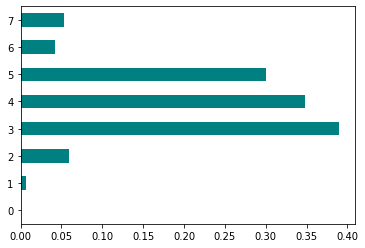

In [14]:
featureimp=pd.Series(importances)
featureimp.plot(kind='barh',color="teal")

In [15]:
#feature allocation
X1=traindf.drop(["num_orders","pricediff",'id','week'],axis=1)
y1=traindf["num_orders"]

In [16]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train1, x_test1, y_train1, y_test1= train_test_split(X1, y1, test_size= 0.25, random_state=0)

In [17]:
x_test1

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
242838,104,1878,292.03,291.03,0,1
314826,29,1993,121.31,119.31,0,0
57041,65,1525,282.33,282.33,0,0
87123,132,1803,197.94,197.94,0,0
154611,39,2139,303.64,302.64,0,0
...,...,...,...,...,...,...
429478,76,1770,485.03,484.03,0,0
271991,50,2304,515.13,514.13,0,0
145963,186,2139,308.49,308.49,0,0
344108,77,1445,707.13,707.13,0,0


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
model= LinearRegression()
model.fit(x_train1,y_train1)

LinearRegression()

In [19]:
Linearreg = model.predict(x_test1)
print(Linearreg)

[495.88580945 388.47605999 255.1321982  ... 182.28854263 -48.5852622
 276.44954023]


In [20]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [21]:
print("R2 score  :",r2_score(y_test1,Linearreg))
print("MSE score  :",mean_squared_error(y_test1,Linearreg))
print("RMSE: ",sqrt(mean_squared_error(y_test1,Linearreg)))

R2 score  : 0.19846747130293918
MSE score  : 122001.50377417139
RMSE:  349.28713657129055


In [22]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X1,y1,test_size=0.20,random_state=1956)
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(X_train2,y_train2)
y_pred = DTRmodel.predict(X_test2)

In [23]:
print("R2 score  :",r2_score(y_test2, y_pred))
print("MSE score  :",mean_squared_error(y_test2, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test2, y_pred)))

R2 score  : 0.2635214796421902
MSE score  : 110472.87066152043
RMSE:  332.3745938869583


In [24]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X1,y1,test_size=0.20,random_state=33)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)
RFRmodel.fit(X_train3,y_train3)
y_pred1 = RFRmodel.predict(X_test3)

In [25]:
print("R2 score  :",r2_score(y_test3, y_pred1))
print("MSE score  :",mean_squared_error(y_test3, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test3, y_pred1)))

R2 score  : 0.26332969878002144
MSE score  : 109019.51066912155
RMSE:  330.1810271186422


**Boosting Performance**

In [26]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train1,y_train1)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [27]:
x_test1

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
242838,104,1878,292.03,291.03,0,1
314826,29,1993,121.31,119.31,0,0
57041,65,1525,282.33,282.33,0,0
87123,132,1803,197.94,197.94,0,0
154611,39,2139,303.64,302.64,0,0
...,...,...,...,...,...,...
429478,76,1770,485.03,484.03,0,0
271991,50,2304,515.13,514.13,0,0
145963,186,2139,308.49,308.49,0,0
344108,77,1445,707.13,707.13,0,0


In [28]:
predboost=regr.predict(x_test1)

In [29]:
print("R2 score  :",r2_score(y_test,predboost))
print("MSE score  :",mean_squared_error(y_test,predboost))
print("RMSE: ",sqrt(mean_squared_error(y_test,predboost)))

R2 score  : -7.017041200790958
MSE score  : 1220276.217492921
RMSE:  1104.6611324261034


**Hyper parameter tuning**

In [30]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RFRmodel
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [31]:
#g=grid_search.fit(x_train,y_train)